In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch
import torch.nn as nn
import visdom

In [4]:
from sklearn.decomposition import PCA

C:\Users\Utkarsh Sah\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [5]:
from preprocessing_utils import process_sat_data, pickle_save, pickle_load
from ellipse_3d import transform3d, fit_ellipse

In [6]:
data_train = pd.read_csv('../data/train.csv')
data_test = pd.read_csv('../data/track1/test.csv')

In [7]:
train_data = data_train.copy(deep=True)
test_data = data_test.copy(deep=True)

In [8]:
process_sat_data(train_data, test_data, scale=10000)

In [9]:
cols = ['x_sim', 'y_sim', 'z_sim']

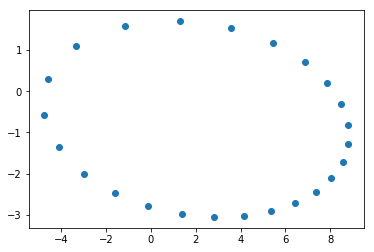

In [10]:
transformed_data = transform3d(train_data, 69, 5, cols)
plt.scatter(transformed_data[:,0], transformed_data[:,1])

In [11]:
model = fit_ellipse(transformed_data)

Final Loss:  5.022628712936239e-08


Major: 6.83281243737907 | Minor: 2.3499693800458674 | Center: (2.0142314434051514,-0.6757811307907104) | Rotation: 176.30022813934383


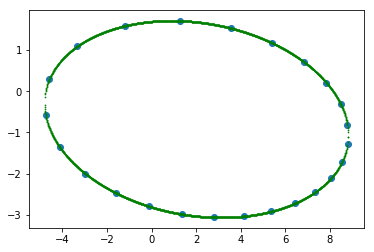

In [12]:
model.plot(transformed_data)

In [83]:
M = np.array([[-0.05803506,  0.63563586, -0.76980451,  0.        ],
       [ 0.64683242,  0.61129534,  0.45598885,  0.        ],
       [ 0.76042077, -0.47147117, -0.44662644,  0.        ],
       [ 0.21627306, -2.14928945,  2.64180069,  1.        ]])

In [86]:
a = M[:3,:3]

In [89]:
np.matmul(a, np.transpose(a)).round()

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])